# 动量法（冲量法）

采用泄漏平均值 leaky average 取代梯度计算：
v_t = beta * v_t-1 + gt,t-1

其中v被称为动量momentum，它累加了过去的梯度，beta是一个超参数，这有效的将瞬时梯度替换为过去梯度的平均值.

较大的beta相当于长期平均值，较小的beta相对于梯度法只是略有修正。

常见的BETA=[0.5,0.9,0.95,0.99]

epoch 20, x1: -0.943467, x2: -0.000073


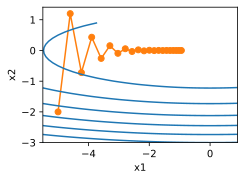

In [2]:
import sys
%matplotlib inline
sys.path.append("../")
import torch as t

eta =0.4

def f_2d(x1:float,x2:float)->float:
    return 0.1*x1**2+2*x2**2
def gd_2d(x1,x2,s1,s2):
    return (x1-eta*0.2*x1,x2-eta*4*x2,0,0)

from pltutils import *
show_trace_2d(f_2d,train_2d(gd_2d))

epoch 20, x1: -0.387814, x2: -1673.365109


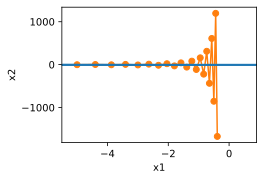

In [4]:
eta = 0.6
show_trace_2d(f_2d, train_2d(gd_2d))

epoch 20, x1: 0.007188, x2: 0.002553


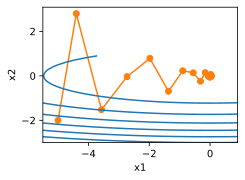

In [6]:
def momentum_2d(x1,x2,v1,v2):
    v1=beta*v1+0.2*x1
    v2=beta*v2+4*x2
    return  x1-eta*v1,x2-eta*v2,v1,v2

eta,beta=0.6,0.5
show_trace_2d(f_2d,train_2d(momentum_2d))

epoch 20, x1: -0.126340, x2: -0.186632


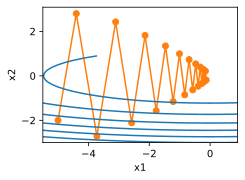

In [15]:
eta,beta=0.6,0.25
show_trace_2d(f_2d,train_2d(momentum_2d))

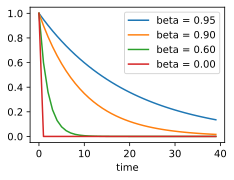

In [16]:
set_figsize()
betas = [0.95, 0.9, 0.6, 0]
for beta in betas:
    x = torch.arange(40).detach().numpy()
    plt.plot(x, beta ** x, label=f'beta = {beta:.2f}')
plt.xlabel('time')
plt.legend()


# conclusion
- 深度学习模型大多是非凸的
- 小批量随机梯度下降是最常用的优化算法
- 冲凉对梯度做平滑
- Adam对梯度做平滑，且对梯度各个维度值做重新调整，对学习率不敏感，调参容易


In [ ]:
import torch.optim as optim

optimizer = optim.SGD()